In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
DATA_PATH = "../data"

In [15]:
date_cols = [
    "FIRST_COLLECTION_SCHEDULE_EARLIEST",
    "FIRST_COLLECTION_SCHEDULE_LATEST",
    "LAST_DELIVERY_SCHEDULE_EARLIEST",
    "LAST_DELIVERY_SCHEDULE_LATEST",
]

shipment_bookings = pd.read_csv(f"{DATA_PATH}/Shipment_bookings.csv", parse_dates=date_cols)
shipment_bookings.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14 01:20:00+00:00,2023-12-14 03:00:00+00:00,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13 09:00:00+00:00,2023-12-13 09:30:00+00:00,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07 14:00:00+00:00,2023-11-07 15:00:00+00:00,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00


In [16]:
shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"].min()

Timestamp('2023-09-29 14:00:00+0000', tz='UTC')

In [17]:
shipment_bookings.columns

Index(['PROJECT_ID', 'SHIPMENT_NUMBER', 'CARRIER_DISPLAY_ID', 'VEHICLE_SIZE',
       'VEHICLE_BUILD_UP', 'FIRST_COLLECTION_POST_CODE',
       'LAST_DELIVERY_POST_CODE', 'FIRST_COLLECTION_LATITUDE',
       'FIRST_COLLECTION_LONGITUDE', 'LAST_DELIVERY_LATITUDE',
       'LAST_DELIVERY_LONGITUDE', 'FIRST_COLLECTION_SCHEDULE_EARLIEST',
       'FIRST_COLLECTION_SCHEDULE_LATEST', 'LAST_DELIVERY_SCHEDULE_EARLIEST',
       'LAST_DELIVERY_SCHEDULE_LATEST'],
      dtype='object')

In [18]:
shipment_bookings.shape

(3245, 15)

In [43]:
# Check for null values
shipment_bookings.isnull().sum()

PROJECT_ID                            0
SHIPMENT_NUMBER                       0
CARRIER_DISPLAY_ID                    0
VEHICLE_SIZE                          0
VEHICLE_BUILD_UP                      0
FIRST_COLLECTION_POST_CODE            1
LAST_DELIVERY_POST_CODE               4
FIRST_COLLECTION_LATITUDE             0
FIRST_COLLECTION_LONGITUDE            0
LAST_DELIVERY_LATITUDE                0
LAST_DELIVERY_LONGITUDE               0
FIRST_COLLECTION_SCHEDULE_EARLIEST    0
FIRST_COLLECTION_SCHEDULE_LATEST      0
LAST_DELIVERY_SCHEDULE_EARLIEST       0
LAST_DELIVERY_SCHEDULE_LATEST         0
LATEST_GPS_TIMESTAMP                  0
DELAYED                               0
COLLECTION_DAY                        0
DELIVERY_DAY                          0
DELIVERY_HOUR                         0
DELIVERY_WINDOW_DURATION              0
SHIPMENT_DURATION                     0
dtype: int64

In [19]:
gps = pd.read_csv(f"{DATA_PATH}/GPS_data.csv", parse_dates=["RECORD_TIMESTAMP"])

In [20]:
gps.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
0,SEZHUK-230918-245388,53.291931,-1.072948,2023-10-09 19:25:00+01:00
1,SEZHUK-230918-245388,53.400404,-1.078563,2023-10-09 19:40:00+01:00
2,SEZHUK-230918-245388,53.574182,-1.215761,2023-10-09 19:55:00+01:00
3,SEZHUK-230918-245388,53.706805,-1.336503,2023-10-09 20:10:00+01:00
4,SEZHUK-230918-245388,53.747501,-1.640298,2023-10-09 20:25:00+01:00


Assuming that the delivery is considered "delivered" at the latest timestamp in the GPS data for its shipment number, we want to calculate whether the maximum `RECORD_TIMESTAMP` in the GPS data is greater than `LAST_DELIVERY_SCHEDULE_LATEST` for each shipment.

In [21]:
latest_gps = gps.sort_values(by="RECORD_TIMESTAMP", ascending=False).drop_duplicates(
    subset=["SHIPMENT_NUMBER"],
    keep="first",
)
latest_gps.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
390552,SEZHUK-231127-266808,52.129432,-1.002753,2023-12-30 23:59:00+00:00
632889,SEZHUK-231226-276773,55.074868,-3.305964,2023-12-30 23:59:00+00:00
587908,SEZHUK-231217-275034,53.763930,-1.740779,2023-12-30 23:52:00+00:00
390144,SEZHUK-231127-266800,53.763930,-1.740779,2023-12-30 23:52:00+00:00
603621,SEZHUK-231219-275529,53.477451,-1.472694,2023-12-30 23:45:00+00:00


In [22]:
# Filter data to shipments  between October 1st and December 31st, 2023

shipment_bookings = shipment_bookings[
    shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"].between(
        "2023-10-01 00:00:00", "2024-12-31 23:59:59"
    )
]
shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"].min(), shipment_bookings[
    "FIRST_COLLECTION_SCHEDULE_EARLIEST"
].max()

(Timestamp('2023-10-01 00:30:00+0000', tz='UTC'),
 Timestamp('2023-12-31 00:30:00+0000', tz='UTC'))

In [23]:
shipment_bookings = shipment_bookings.merge(
    latest_gps[["SHIPMENT_NUMBER", "RECORD_TIMESTAMP"]].rename(
        {"RECORD_TIMESTAMP": "LATEST_GPS_TIMESTAMP"}, axis=1
    ),
    on="SHIPMENT_NUMBER",
    how="left",
)
shipment_bookings.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,LATEST_GPS_TIMESTAMP
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,2023-10-06 10:24:00+01:00
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,2023-12-20 04:08:00+00:00
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14 01:20:00+00:00,2023-12-14 03:00:00+00:00,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00,2023-12-14 10:18:00+00:00
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13 09:00:00+00:00,2023-12-13 09:30:00+00:00,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00,2023-12-13 17:22:00+00:00
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07 14:00:00+00:00,2023-11-07 15:00:00+00:00,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00,2023-11-08 03:53:00+00:00


### Percentage of shipments delayed

In [24]:
# Calculating the % of delayed shipments

shipment_bookings["DELAYED"] = (
    shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"] + pd.Timedelta("30 minutes")
    < shipment_bookings["LATEST_GPS_TIMESTAMP"]
)
delayed = round(shipment_bookings["DELAYED"].mean(), 2)
print(f"{delayed * 100}% of shipments are delayed.")

37.0% of shipments are delayed.


### Data Cleaning

In [26]:
shipment_bookings.to_csv(f"{DATA_PATH}/shipment_bookings_labelled.csv", index=False)

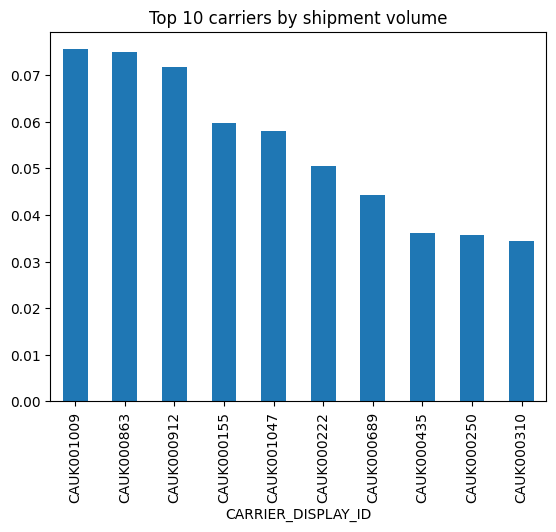

In [27]:
carrier_share = (
    shipment_bookings.groupby("CARRIER_DISPLAY_ID")["DELAYED"]
    .count()
    .sort_values(ascending=False)
    / shipment_bookings.shape[0]
)
carrier_share[:10].plot.bar(title="Top 10 carriers by shipment volume")
plt.show()

In [28]:
shipment_bookings["VEHICLE_SIZE"].unique()

array(['Tractor Unit', '3.5T Van', '3.5 T Van', '18T Rigid', '26T Rigid',
       '7.5T Rigid'], dtype=object)

In [29]:
# Clean up VEHICLE_SIZE

shipment_bookings["VEHICLE_SIZE"] = shipment_bookings["VEHICLE_SIZE"].str.replace(" T", "T")

              TOTAL_SHIPMENTS  DELAYED_SHIPMENTS
VEHICLE_SIZE                                    
Tractor Unit             2587               1098
3.5T Van                  599                 63
18T Rigid                  20                 20
7.5T Rigid                 10                 10
26T Rigid                   4                  0


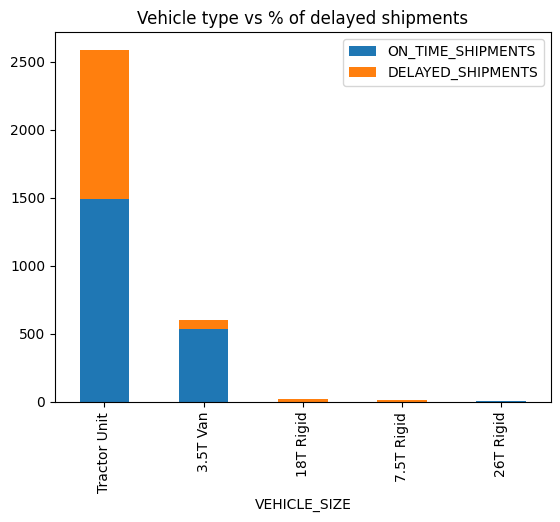

In [42]:
# Inspect delayed rates by vehicle size

print(
    vehicle_size_counts := shipment_bookings.groupby("VEHICLE_SIZE")["DELAYED"]
    .agg(["count", "sum"])
    .sort_values(by="count", ascending=False)
    .rename({"count": "TOTAL_SHIPMENTS", "sum": "DELAYED_SHIPMENTS"}, axis=1)
)
vehicle_size_counts["ON_TIME_SHIPMENTS"] = (
    vehicle_size_counts["TOTAL_SHIPMENTS"] - vehicle_size_counts["DELAYED_SHIPMENTS"]
)
vehicle_size_counts
vehicle_size_counts[["ON_TIME_SHIPMENTS", "DELAYED_SHIPMENTS"]].plot.bar(
    title="Vehicle type vs % of delayed shipments", stacked=True
)
plt.show()

In [31]:
shipment_bookings["VEHICLE_BUILD_UP"].unique()

array(['Curtain-Side 13.6M Trailer', 'Box 44ft', 'Curtain Side',
       'LWB Van', 'Box', 'Tractor Only', 'Tractor Only 6x2',
       'Temperature-Controlled', 'Double Deck Trailer', '40ft Container',
       'High Security', 'Box 40ft', '20ft Container'], dtype=object)

                            TOTAL_SHIPMENTS  DELAYED_SHIPMENTS
VEHICLE_BUILD_UP                                              
Curtain-Side 13.6M Trailer             1776                784
Box 44ft                                472                201
Box                                     415                 79
LWB Van                                 367                 44
Curtain Side                             78                 59
Tractor Only                             45                 13
Tractor Only 6x2                         39                  4
Temperature-Controlled                   31                 16
40ft Container                           14                  7
Double Deck Trailer                       4                  3
20ft Container                            1                  1
Box 40ft                                  1                  0
High Security                             1                  1


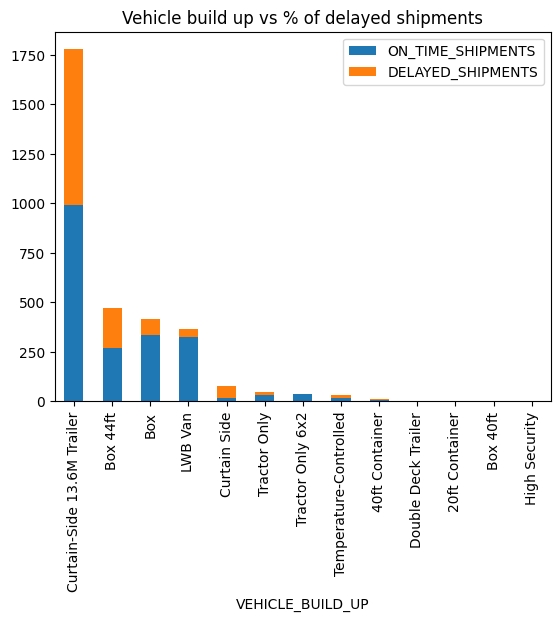

In [32]:
print(
    vehicle_size_counts := shipment_bookings.groupby("VEHICLE_BUILD_UP")["DELAYED"]
    .agg(["count", "sum"])
    .sort_values(by="count", ascending=False)
    .rename({"count": "TOTAL_SHIPMENTS", "sum": "DELAYED_SHIPMENTS"}, axis=1)
)
vehicle_size_counts["ON_TIME_SHIPMENTS"] = (
    vehicle_size_counts["TOTAL_SHIPMENTS"] - vehicle_size_counts["DELAYED_SHIPMENTS"]
)
vehicle_size_counts
vehicle_size_counts[["ON_TIME_SHIPMENTS", "DELAYED_SHIPMENTS"]].plot.bar(
    title="Vehicle build up vs % of delayed shipments", stacked=True
)
plt.show()

### Time features

Min booking hour: <bound method Series.min of 0       10
1        8
2       10
3       16
4       23
        ..
3239     3
3240    17
3241     3
3242     7
3243     9
Name: DELIVERY_HOUR, Length: 3244, dtype: int32>
Max booking hour: 23


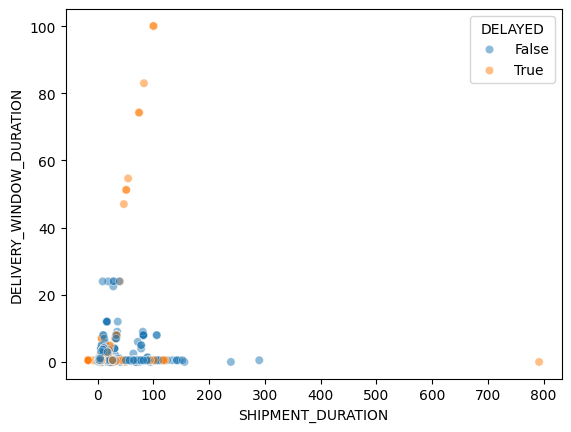

In [33]:
# Extracting day of the week from the earliest collection date
shipment_bookings["COLLECTION_DAY"] = shipment_bookings[
    "FIRST_COLLECTION_SCHEDULE_EARLIEST"
].dt.day_name()
# Extracting day of the week from the latest delivery date
shipment_bookings["DELIVERY_DAY"] = shipment_bookings[
    "LAST_DELIVERY_SCHEDULE_LATEST"
].dt.day_name()
# Extracting the hour of the day from the latest delivery date
shipment_bookings["DELIVERY_HOUR"] = shipment_bookings[
    "LAST_DELIVERY_SCHEDULE_LATEST"
].dt.hour

print(f"Min booking hour: {shipment_bookings["DELIVERY_HOUR"].min}")
print(f"Max booking hour: {shipment_bookings["DELIVERY_HOUR"].max()}")
      # Durations
# Delivery window duration
shipment_bookings["DELIVERY_WINDOW_DURATION"] = (
    shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"]
    - shipment_bookings["LAST_DELIVERY_SCHEDULE_EARLIEST"]
).dt.total_seconds() / 3600

# Shipment duration
shipment_bookings["SHIPMENT_DURATION"] = (
    shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"]
    - shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"]
).dt.total_seconds() / 3600

sns.scatterplot(
    data=shipment_bookings,
    x="SHIPMENT_DURATION",
    y="DELIVERY_WINDOW_DURATION",
    hue="DELAYED",
    alpha=0.5,
)
plt.show()

In [34]:
# Drop delivery windows over 24 hours
shipment_bookings = shipment_bookings[
    shipment_bookings["DELIVERY_WINDOW_DURATION"] <= 24
]
# Drop shipment durations over 180 days
shipment_bookings = shipment_bookings[shipment_bookings["SHIPMENT_DURATION"] <= 180]

# Inspect 0 and negative shipment durations
shipment_bookings.loc[
    shipment_bookings["SHIPMENT_DURATION"] <= 0,
    [
        "SHIPMENT_NUMBER",
        "FIRST_COLLECTION_SCHEDULE_EARLIEST",
        "LAST_DELIVERY_SCHEDULE_LATEST",
        "SHIPMENT_DURATION",
    ],
]

,SHIPMENT_NUMBER,FIRST_COLLECTION_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,SHIPMENT_DURATION
319,SEZHUK-231220-276089,2023-12-21 19:00:00+00:00,2023-12-21 10:45:00+00:00,-8.25
456,SEZHUK-231215-274563,2023-12-16 10:00:00+00:00,2023-12-15 17:00:00+00:00,-17.00
537,SEZHUK-231215-274632,2023-12-17 20:00:00+00:00,2023-12-17 03:00:00+00:00,-17.00
802,SEZHUK-231215-274628,2023-12-16 10:00:00+00:00,2023-12-15 17:00:00+00:00,-17.00
850,SEZHUK-231215-274570,2023-12-17 18:00:00+00:00,2023-12-17 01:00:00+00:00,-17.00
925,SEZHUK-231216-274798,2023-12-21 03:30:00+00:00,2023-12-20 23:00:00+00:00,-4.50
1090,SEZHUK-231215-274639,2023-12-16 10:00:00+00:00,2023-12-15 17:00:00+00:00,-17.00
1857,SEZHUK-231018-253947,2023-10-18 14:00:00+00:00,2023-10-18 11:00:00+00:00,-3.00
2461,SEZHUK-231205-269918,2023-12-06 06:00:00+00:00,2023-12-06 06:00:00+00:00,0.00
3061,SEZHUK-231212-272610,2023-12-13 18:30:00+00:00,2023-12-13 01:30:00+00:00,-17.00


It's possible that these times have been switched over, but unless we know for certain, and we have enough data to play with, it's probably better to remove these from our training data.

In [35]:
# Drop 0 and negative shipment durations
shipment_bookings.drop(
    index=shipment_bookings[shipment_bookings["SHIPMENT_DURATION"] <= 0].index,
    inplace=True,
)

In [36]:
# Inspect rows with EARLIEST columns > LATEST columns
shipment_bookings.loc[
    (shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"]
    > shipment_bookings["FIRST_COLLECTION_SCHEDULE_LATEST"]) |
    (shipment_bookings["LAST_DELIVERY_SCHEDULE_EARLIEST"]
     > shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"]),
    [
        "SHIPMENT_NUMBER",
        "FIRST_COLLECTION_SCHEDULE_EARLIEST",
        "FIRST_COLLECTION_SCHEDULE_LATEST",
        "LAST_DELIVERY_SCHEDULE_EARLIEST",
        "LAST_DELIVERY_SCHEDULE_LATEST",
    ],
]


,SHIPMENT_NUMBER,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
755,SEZHUK-231011-251901,2023-10-16 14:00:00+00:00,2023-10-16 12:56:00+00:00,2023-10-17 19:55:00+00:00,2023-10-17 20:25:00+00:00
874,SEZHUK-231026-256940,2023-10-27 14:00:00+00:00,2023-10-27 13:00:00+00:00,2023-10-28 00:01:00+00:00,2023-10-28 00:31:00+00:00


In [37]:
# Drop rows with EARLIEST columns > LATEST columns
shipment_bookings.drop(
    index=shipment_bookings[
        (shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"]
         > shipment_bookings["FIRST_COLLECTION_SCHEDULE_LATEST"]) |
        (shipment_bookings["LAST_DELIVERY_SCHEDULE_EARLIEST"]
         > shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"])
    ].index,
    inplace=True,
)

In [38]:
shipment_bookings.shape

(3220, 22)